In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 

In [19]:
glob.glob(r'/Users/xiao/Downloads/data project/stock_price/individual_stocks_5yr/*.csv')
company_list = [
    r'/Users/xiao/Downloads/data project/stock_price/individual_stocks_5yr/XRX_data.csv',
    r'/Users/xiao/Downloads/data project/stock_price/individual_stocks_5yr/GS_data.csv',
    r'/Users/xiao/Downloads/data project/stock_price/individual_stocks_5yr/SPGI_data.csv',
    r'/Users/xiao/Downloads/data project/stock_price/individual_stocks_5yr/MTB_data.csv',
]

In [20]:
all_data = pd.DataFrame()
for file in company_list:
    df = pd.read_csv(file)
    all_data = pd.concat([all_data, df] , ignore_index=True)

In [ ]:
pd.to_datetime(all_data['date'])

In [27]:
company_names = all_data['Name'].unique()

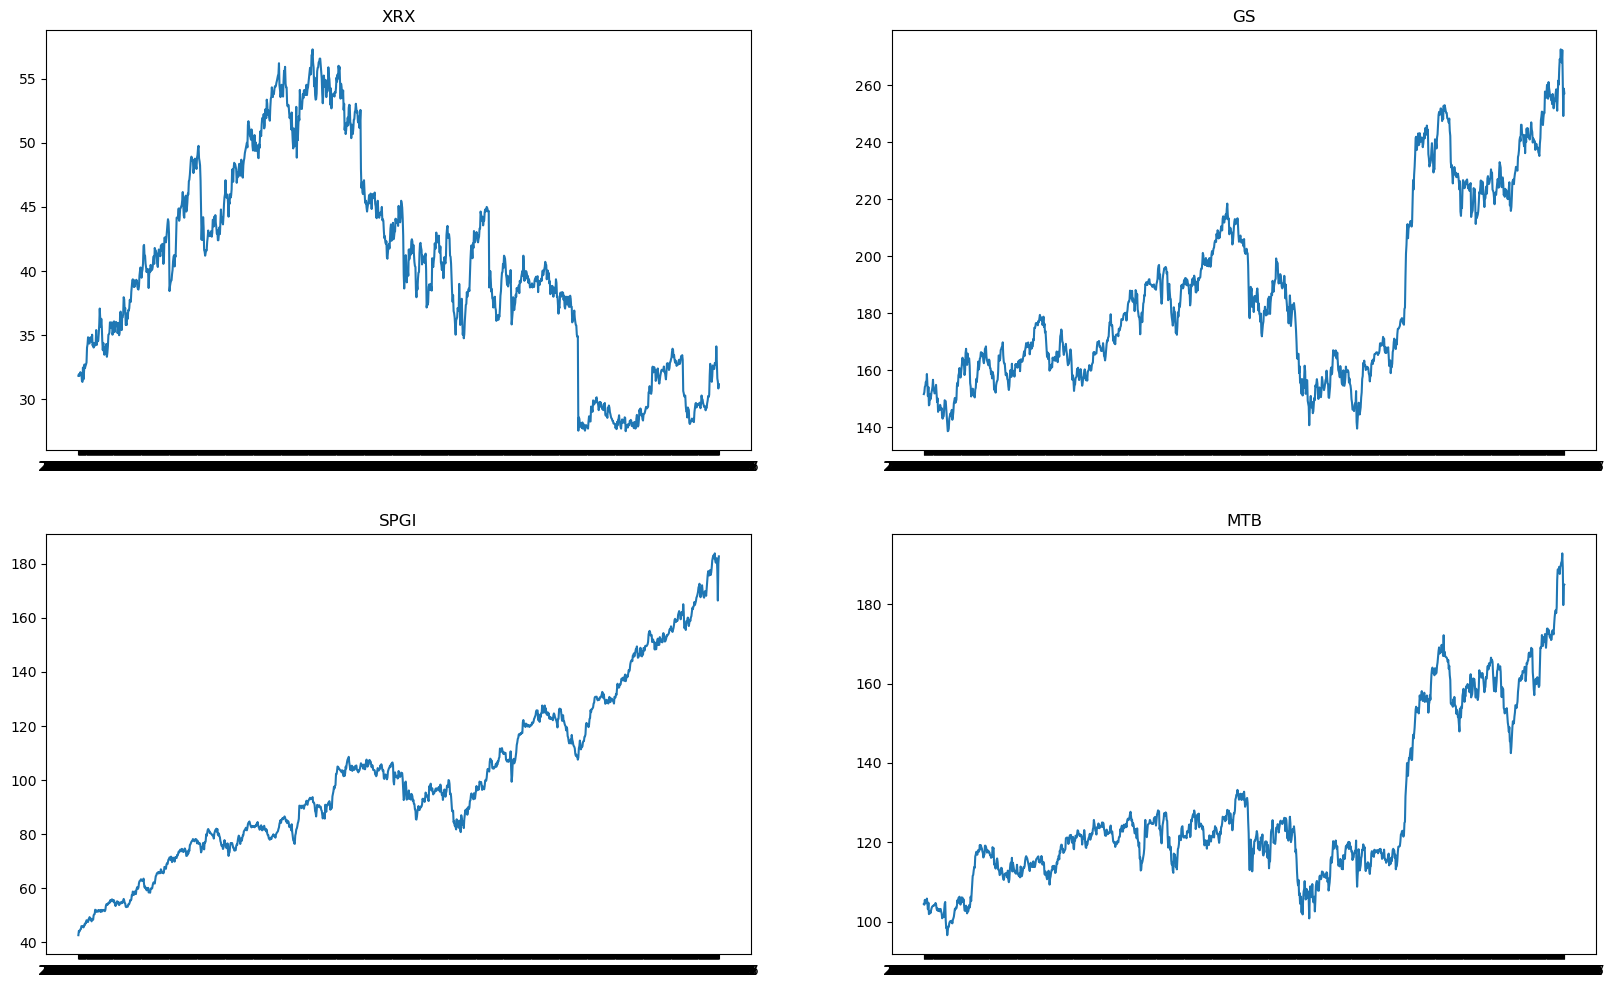

In [29]:
plt.figure(figsize=(20,12))
for index, company in enumerate(company_names,1):
    plt.subplot(2 , 2 , index)
    current_df = all_data[all_data['Name'] == company]
    plt.plot(current_df['date'], current_df['close'] )
    plt.title(company)

In [35]:
window_number = [10, 20, 50]
for window in window_number:
    all_data['close_' + str(window)] = all_data['close'].rolling(window).mean()

In [37]:
all_data.set_index('date', inplace = True)

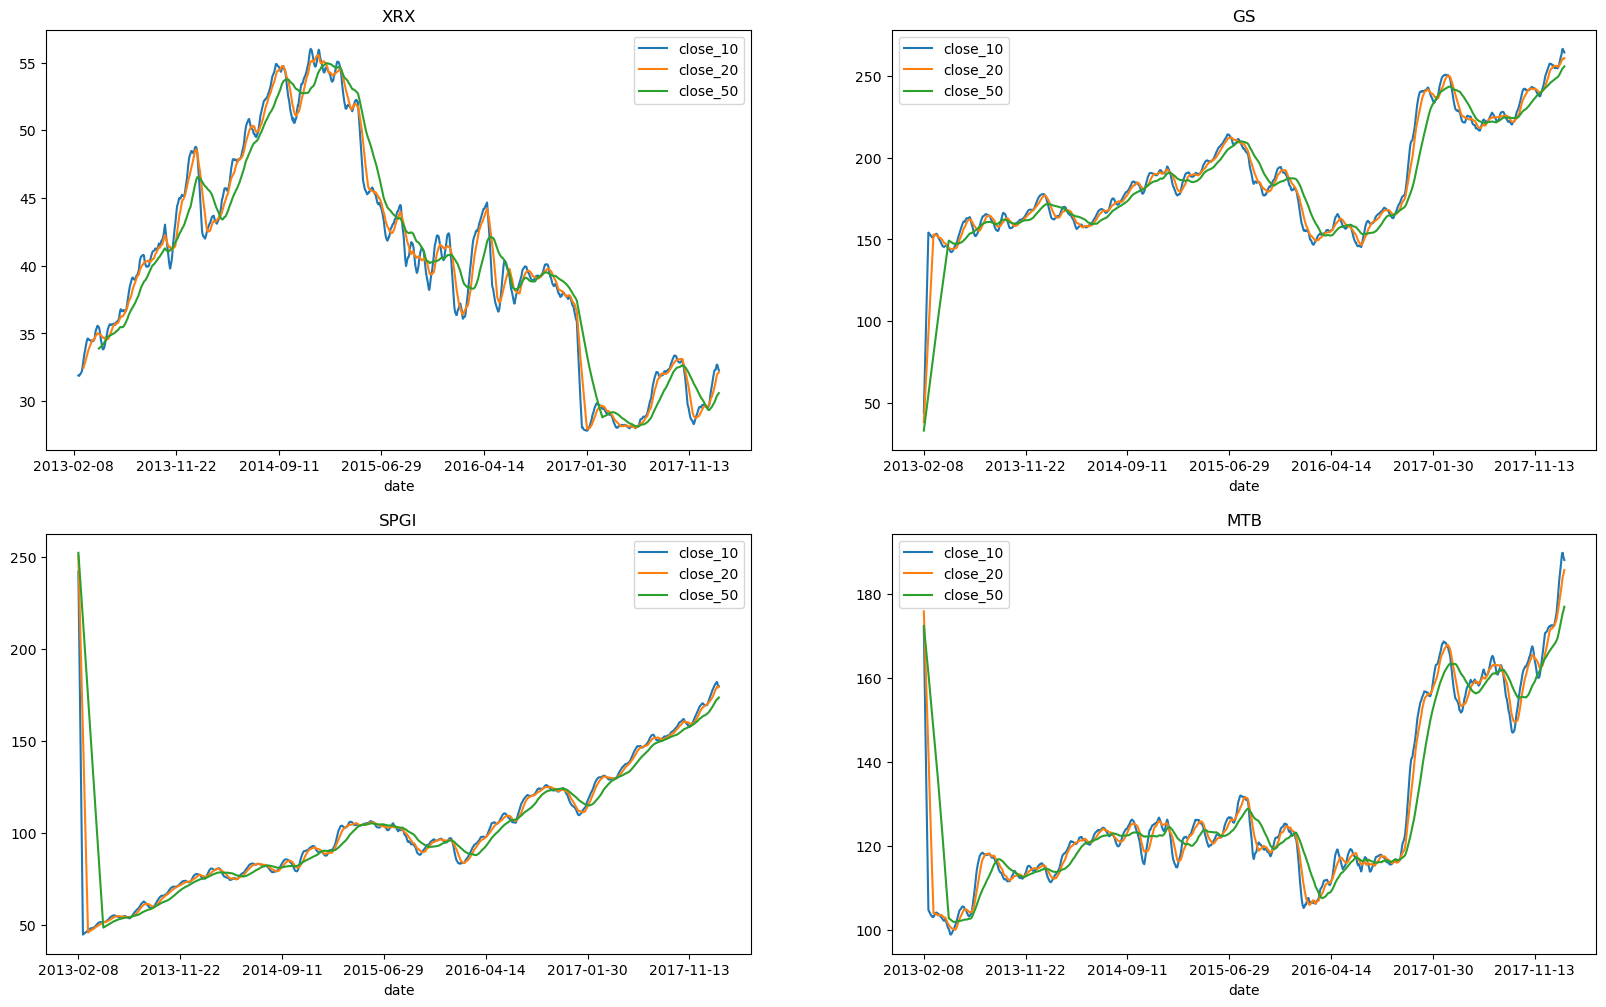

In [43]:
plt.figure(figsize=(20,12))
for index, company in enumerate(company_names,1):
    plt.subplot(2 , 2 , index)
    current_df = all_data[all_data['Name'] == company]
    current_df[['close_10','close_20','close_50' ]].plot(ax=plt.gca())
    plt.title(company)